In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Set plot style
plt.style.use('ggplot')

In [3]:
# Load the dataset
df = pd.read_csv('../data/processed/final_model_ready_data.csv')

# Features for 65%+ target
features = ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'HTFormPts', 'ATFormPts', 'B365H', 'B365D', 'B365A']
X = df[features]
y = df['FTR_Binary']

# STRICT 80/20 CHRONOLOGICAL SPLIT
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Scaling is still recommended for consistency across all 5 models
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(f"Training on: {len(X_train)} matches")
print(f"Testing on: {len(X_test)} matches (Recent 20%)")

Training on: 6416 matches
Testing on: 1604 matches (Recent 20%)


In [4]:
# Initialize and train Gaussian Naive Bayes
# This assumes the features follow a normal distribution
nb_model = GaussianNB()
nb_model.fit(X_train_s, y_train)

# Get Predictions
y_pred = nb_model.predict(X_test_s)

# Get Probabilities (For Question #2 in your front-end)
y_probs = nb_model.predict_proba(X_test_s)

print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Naive Bayes Accuracy: 66.77%


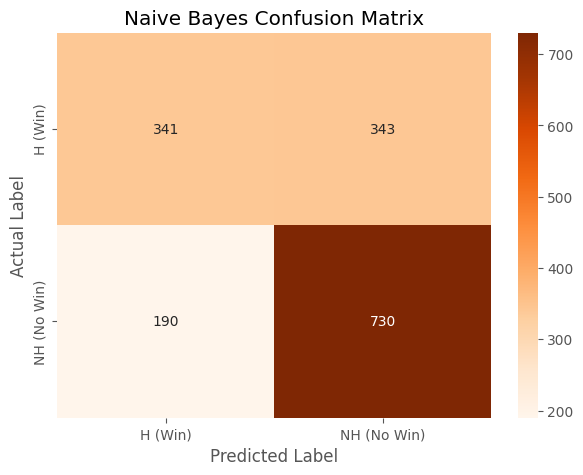


Detailed Classification Report:
              precision    recall  f1-score   support

           H       0.64      0.50      0.56       684
          NH       0.68      0.79      0.73       920

    accuracy                           0.67      1604
   macro avg       0.66      0.65      0.65      1604
weighted avg       0.66      0.67      0.66      1604



In [5]:
# Generate the 4-box Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['H (Win)', 'NH (No Win)'], 
            yticklabels=['H (Win)', 'NH (No Win)'])

plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

In [6]:
# Save the model and scaler
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Files 'nb_model.pkl' and 'scaler.pkl' saved in the models/ folder.")

Files 'nb_model.pkl' and 'scaler.pkl' saved in the models/ folder.
